# Tumor Diagnosis (Exploratory Data Analysis & Classification Model)
![](https://medicine.wustl.edu/wp-content/uploads/Brain-Scans-700x400.jpg)


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Loading Libraries and Data

In [50]:
%reload_ext lab_black

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [51]:
from IPython.display import HTML

HTML(
    """<script>
var code_show_err = false; 
var code_toggle_err = function() {
 var stderrNodes = document.querySelectorAll('[data-mime-type="application/vnd.jupyter.stderr"]')
 var stderr = Array.from(stderrNodes)
 if (code_show_err){
     stderr.forEach(ele => ele.style.display = 'block');
 } else {
     stderr.forEach(ele => ele.style.display = 'none');
 }
 code_show_err = !code_show_err
} 
document.addEventListener('DOMContentLoaded', code_toggle_err);
</script>
To toggle on/off output_stderr, click <a onclick="javascript:code_toggle_err()">here</a>."""
)

In [52]:
data = pd.read_csv("data/data.csv")

<h2 align=center> Exploratory Data Analysis </h2>

---

### Separate Target from Features

In [53]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,18.0,10.4,122.8,1001.0,0.1,0.3,0.3,0.1,...,17.3,184.6,2019.0,0.2,0.7,0.7,0.3,0.5,0.1,nan
1,842517,M,20.6,17.8,132.9,1326.0,0.1,0.1,0.1,0.1,...,23.4,158.8,1956.0,0.1,0.2,0.2,0.2,0.3,0.1,nan
2,84300903,M,19.7,21.2,130.0,1203.0,0.1,0.2,0.2,0.1,...,25.5,152.5,1709.0,0.1,0.4,0.5,0.2,0.4,0.1,nan
3,84348301,M,11.4,20.4,77.6,386.1,0.1,0.3,0.2,0.1,...,26.5,98.9,567.7,0.2,0.9,0.7,0.3,0.7,0.2,nan
4,84358402,M,20.3,14.3,135.1,1297.0,0.1,0.1,0.2,0.1,...,16.7,152.2,1575.0,0.1,0.2,0.4,0.2,0.2,0.1,nan


#'ID' has to be either dropped or put as index
#'Diagnosis' column is the target that i want to predict
#'Unnamed: 32' column has to be dropped

In [54]:
col = data.columns
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [55]:
y = data.diagnosis

drop_cols = ["id", "diagnosis", "Unnamed: 32"]

x = data.drop(drop_cols, axis=1)
# axis=1 because dropping columns


x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,18.0,10.4,122.8,1001.0,0.1,0.3,0.3,0.1,0.2,0.1,...,25.4,17.3,184.6,2019.0,0.2,0.7,0.7,0.3,0.5,0.1
1,20.6,17.8,132.9,1326.0,0.1,0.1,0.1,0.1,0.2,0.1,...,25.0,23.4,158.8,1956.0,0.1,0.2,0.2,0.2,0.3,0.1
2,19.7,21.2,130.0,1203.0,0.1,0.2,0.2,0.1,0.2,0.1,...,23.6,25.5,152.5,1709.0,0.1,0.4,0.5,0.2,0.4,0.1
3,11.4,20.4,77.6,386.1,0.1,0.3,0.2,0.1,0.3,0.1,...,14.9,26.5,98.9,567.7,0.2,0.9,0.7,0.3,0.7,0.2
4,20.3,14.3,135.1,1297.0,0.1,0.1,0.2,0.1,0.2,0.1,...,22.5,16.7,152.2,1575.0,0.1,0.2,0.4,0.2,0.2,0.1


### Plot Diagnosis Distributions


Number of Benign tumors:  357
Number of Malignant tumors:  212


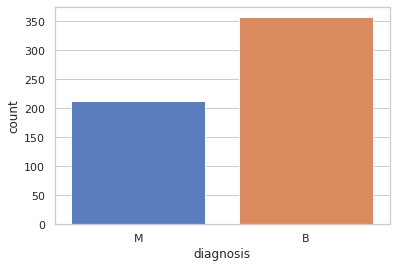

In [56]:
ax = sns.countplot(y, label="Count")
B, M = y.value_counts()
print("Number of Benign tumors: ", B)
print("Number of Malignant tumors: ", M)

In [57]:
x.describe()

# There's a huge difference between maximum of features, so we might need to standerdize

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,...,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0,569.0
mean,14.1,19.3,92.0,654.9,0.1,0.1,0.1,0.0,0.2,0.1,...,16.3,25.7,107.3,880.6,0.1,0.3,0.3,0.1,0.3,0.1
std,3.5,4.3,24.3,351.9,0.0,0.1,0.1,0.0,0.0,0.0,...,4.8,6.1,33.6,569.4,0.0,0.2,0.2,0.1,0.1,0.0
min,7.0,9.7,43.8,143.5,0.1,0.0,0.0,0.0,0.1,0.0,...,7.9,12.0,50.4,185.2,0.1,0.0,0.0,0.0,0.2,0.1
25%,11.7,16.2,75.2,420.3,0.1,0.1,0.0,0.0,0.2,0.1,...,13.0,21.1,84.1,515.3,0.1,0.1,0.1,0.1,0.3,0.1
50%,13.4,18.8,86.2,551.1,0.1,0.1,0.1,0.0,0.2,0.1,...,15.0,25.4,97.7,686.5,0.1,0.2,0.2,0.1,0.3,0.1
75%,15.8,21.8,104.1,782.7,0.1,0.1,0.1,0.1,0.2,0.1,...,18.8,29.7,125.4,1084.0,0.1,0.3,0.4,0.2,0.3,0.1
max,28.1,39.3,188.5,2501.0,0.2,0.3,0.4,0.2,0.3,0.1,...,36.0,49.5,251.2,4254.0,0.2,1.1,1.3,0.3,0.7,0.2


<h2 align=center> Data Visualization </h2>

---

### Visualizing Standardized Data with Seaborn


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

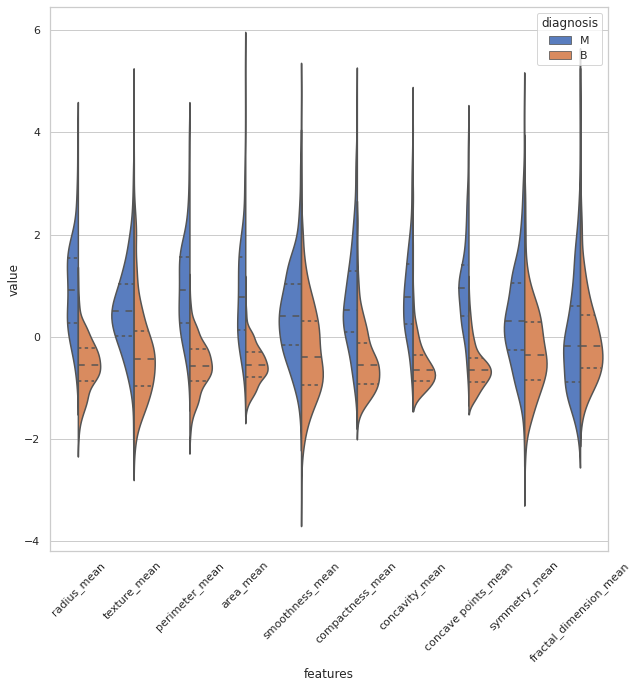

In [58]:
data = x

data_std = (data - data.mean()) / data.std()

data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)


# we need to unpivot it to wide format, we can use melt method

data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(10, 10))

sns.violinplot(
    x="features",
    y="value",
    hue="diagnosis",  # hue
    data=data,
    split=True,
    inner="quart",
)

plt.xticks(rotation=45)

When we check the above diagram, for example:

Texture_Mean, it's median is far for B and M, so would indicate it as good feature for differentiation. However, if you look at the last one, the median doesn't look like it is well separated, so might mean it will not give good prediction.

### Violin Plots and Box Plots


In [59]:
#Now we will try to make comparison between features 10th to 19th
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1)

data = pd.melt(data, id_vars = 'diagnosis',
              var_name = 'features',
              value_name = 'value')

plt.figure(figsize=(10,10))

sns.violinplot(x='features',
               y='value',
               hue='diagnosis',    
               split=True,
               inner='quartile',
              )

plt.xticks(rotation=45);

ValueError: Could not interpret input 'features'

<Figure size 720x720 with 0 Axes>

Clearly we have a stark difference in features here

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean'),
  Text(10, 0, 'radius_se'),
  Text(11, 0, 'texture_se'),
  Text(12, 0, 'perimeter_se'),
  Text(13, 0, 'area_se'),
  Text(14, 0, 'smoothness_se'),
  Text(15, 0, 'compactness_se'),
  Text(16, 0, 'concavity_se'),
  Text(17, 0, 'concave points_se'),
  Text(18, 0, 'symmetry_se'),
  Text(19, 0, 'fractal_dimension_se')])

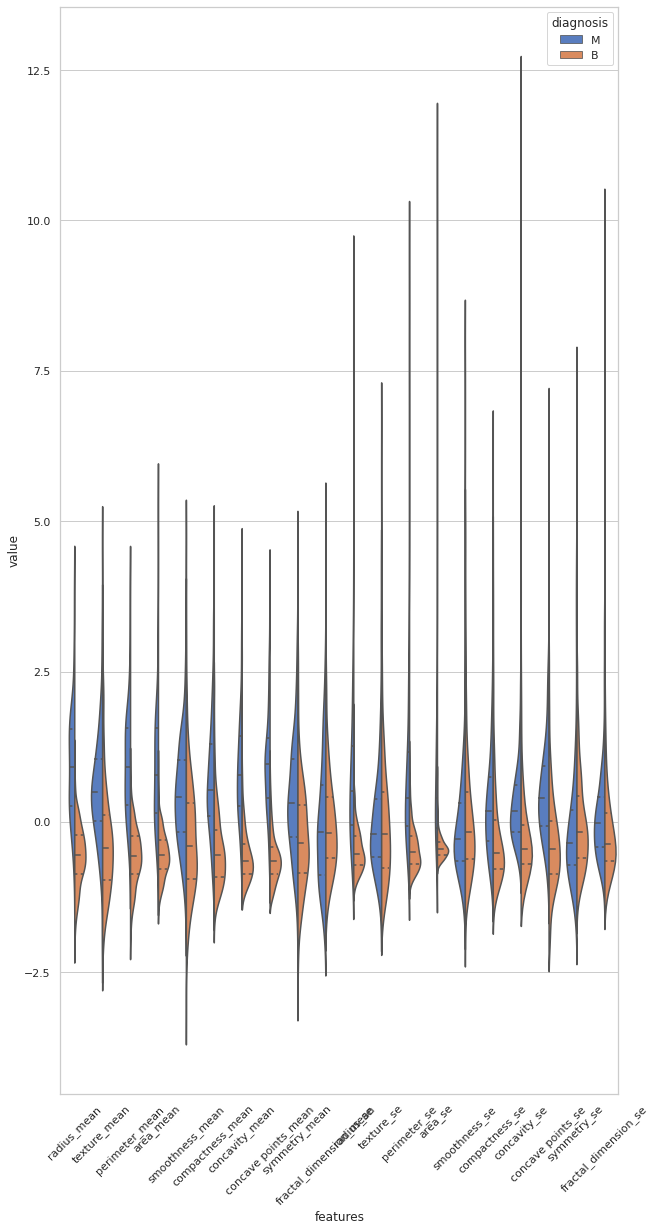

In [60]:
# Now we will try to make comparison between more feature 0 to 19th
data = pd.concat([y, data_std.iloc[:, 0:20]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

# We need to decrease the figure size
plt.figure(figsize=(10, 20))

sns.violinplot(
    x="features",
    y="value",
    hue="diagnosis",
    data=data,
    split=True,
    inner="quart",
)

plt.xticks(rotation=45)

this is all cluttered, so this is **NOT** best way to visualize your data and make interpretations

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

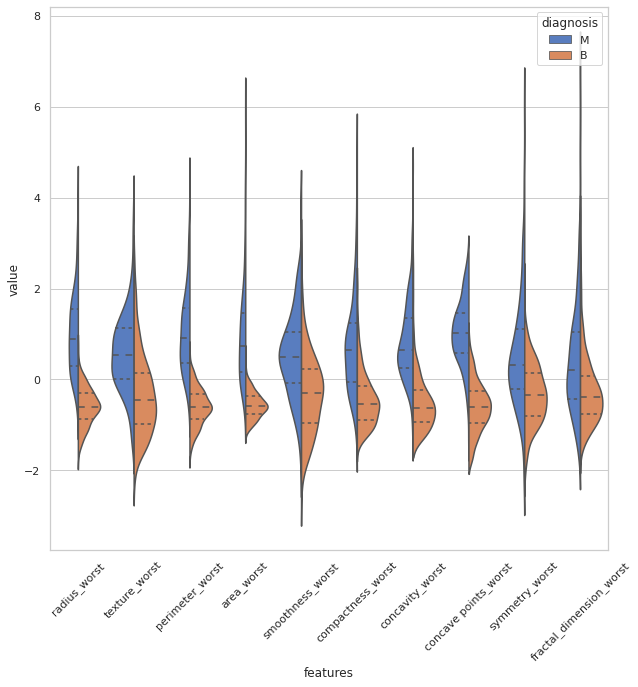

In [61]:
# Now we will return to normal 10 features and compare between features 20th to 30th
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(10, 10))

sns.violinplot(
    x="features",
    y="value",
    hue="diagnosis",
    data=data,
    split=True,
    inner="quart",
)

plt.xticks(rotation=45)

Features: *compactness worst*, *concativity worst* and *concave points worst* 

look similar so we might need to explore if they are related to each other and remove one of them.
Because they might negatively impact our predictive classifier.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

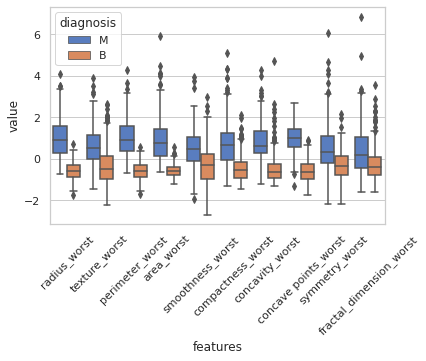

In [62]:
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=45)

This boxplot clearly shows the outliers in each feature in my data.

### Using Joint Plots for Feature Comparison


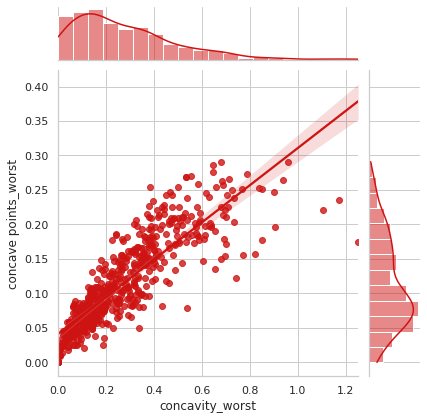

In [63]:
sns.jointplot(
    x.loc[:, "concavity_worst"],  # we need all rows of this column
    x.loc[:, "concave points_worst"],
    kind="reg",  # this focuses on regression type plots
    color="#ce1413",
)

We can tell that these 2 features are highly correlated.
The pearson correlation is not given here, but you can calculate that also using more quantitative methods.

###  Observing the Distribution of Values and their Variance with Swarm Plots


The cool thing in swarm plots is that you clearly see the variance between the features of your target.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

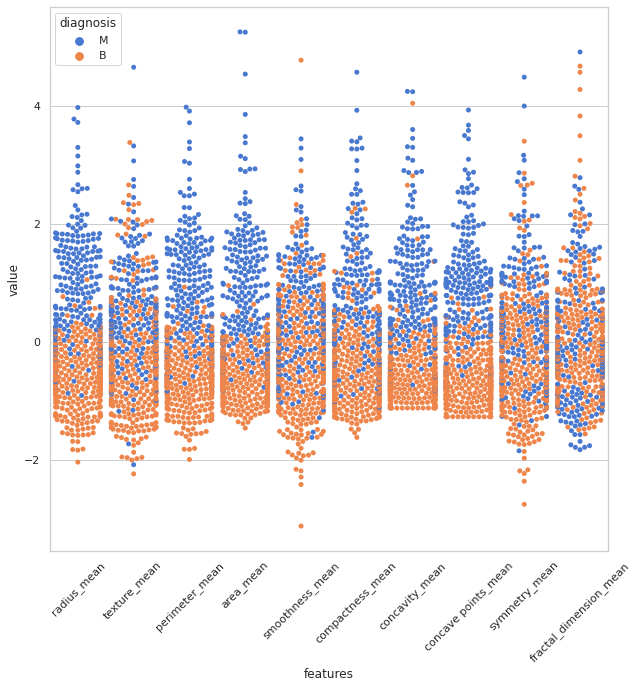

In [64]:
sns.set(
    style="whitegrid",
    palette="muted",
)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 0:10]], axis=1)


data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(10, 10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

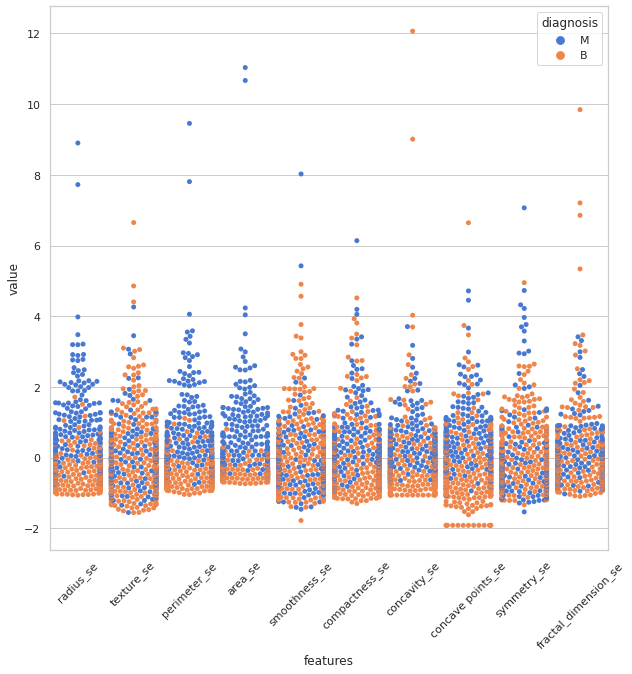

In [65]:
sns.set(
    style="whitegrid",
    palette="muted",
)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 10:20]], axis=1)

data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(10, 10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

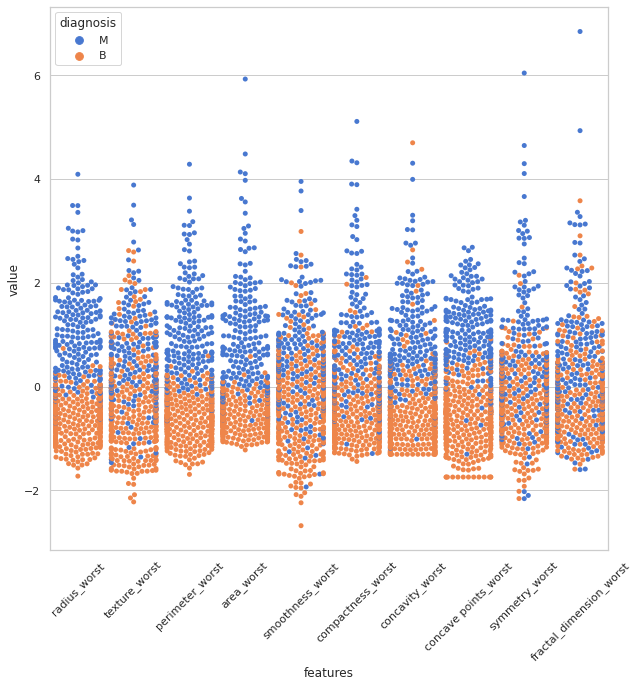

In [66]:
sns.set(
    style="whitegrid",
    palette="muted",
)

data = x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 20:30]], axis=1)


data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name="value")

plt.figure(figsize=(10, 10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=45)

As observed in smoothness worst feature, this is bad feature to use because there is a mixture and not well separated.

On the contrary, *perimeter worst* or *area worst* have good predictive power.

Ok, all this time we were seeing the correlations in batches, but now we want to see the correlation between all the features so we will make a correlation matrix with heat map built on top of it.

### Observing all Pair-wise Correlations


<AxesSubplot:>

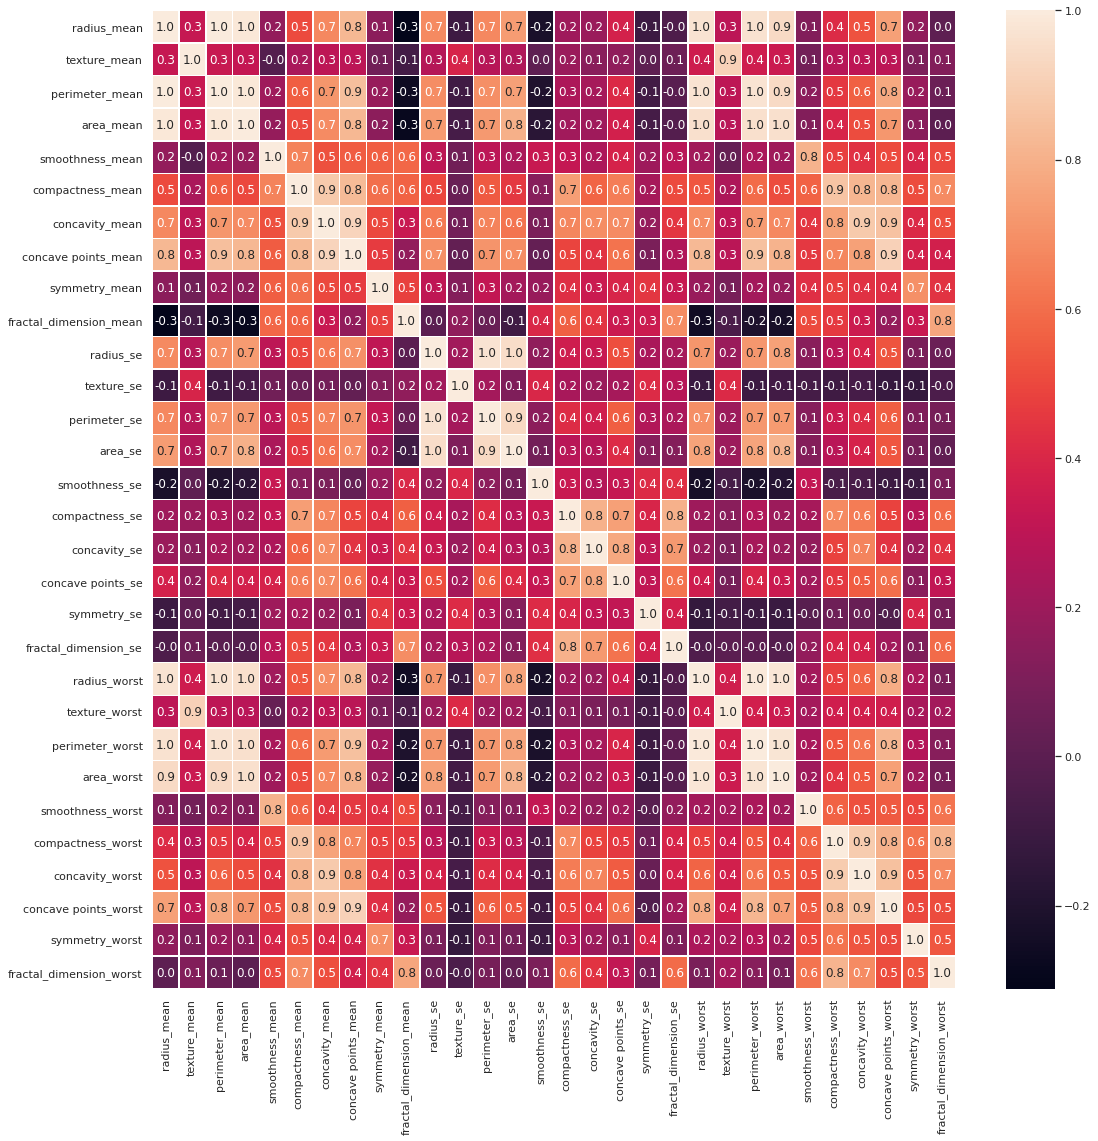

In [67]:
f, ax = plt.subplots(figsize=(18, 18))  # 30 features
sns.heatmap(
    x.corr(),
    annot=True,  # pearson-correlation
    linewidth=0.5,
    fmt=".1f",  # 1 decimal place
    ax=ax,
)


<h2 align=center> Classification Model </h2>

---

In [68]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import h5py  # for hdf5 data format
import cv2  # opencv


pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

np.set_printoptions(linewidth=200)

### About the Dataset:

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
cjdata.PID: patient ID
cjdata.image: image data
cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.
		For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
		It was generated by manually delineating the tumor border. So we can use it to generate
		binary image of tumor mask.
cjdata.tumorMask: a binary image with 1s indicating tumor region

-----
This data was used in the following paper:
1. Cheng, Jun, et al. "Enhanced Performance of Brain Tumor Classification via Tumor Region Augmentation
and Partition." PloS one 10.10 (2015).
2. Cheng, Jun, et al. "Retrieval of Brain Tumors by Adaptive Spatial Pooling and Fisher Vector 
Representation." PloS one 11.6 (2016). Matlab source codes are available on 
[github](https://github.com/chengjun583/brainTumorRetrieval)

In [73]:
# loading data

tumordatadir = (
    "/home/blaq/Documents/Project/brain-tumor-diagnosis-Neural-Net/data/braintumor-data"
)

# Converting all the data into Python list

N = 3064
traindata = []
for i in range(1, N + 1):
    filename = str(i) + ".mat"
    tumordata = h5py.File(os.path.join(tumordatadir, filename), "r")
    traindata.append(tumordata)
    if i % 1000 == 0:
        print(filename)

1000.mat
2000.mat
3000.mat


In [83]:
import random

random.shuffle(traindata)  # shuffling data to remove bias

In [90]:
# Extracting image data from Python List
trainx = []
testx = []
trainy = []
testy = []

temp = round(4 * N / 5)  # using 4/5th as training data

# trainx,trainy
for i in range(temp):
    image = traindata[i]["cjdata"]["image"].value

    if image.shape == (512, 512):
        image = np.expand_dims(image, axis=0)
        trainx.append(image)

        label = int(traindata[i]["cjdata"]["label"].value) - 1
        trainy.append(label)

# testx and testy
for i in range(temp, N):
    image = np.asarray(traindata[i]["cjdata"]["image"].value)

    if image.shape == (512, 512):
        image = np.expand_dims(image, axis=0)
        testx.append(image)

        label = int(traindata[i]["cjdata"]["label"].value) - 1
        testy.append(label)

# Converting Y list to numpy array
trainy = np.array(trainy)
testy = np.array(testy)

## Defining plotting function

In [89]:
""" curve of one or more classification metrics vs epoch """ 
def plot_curve(epochs, hist, list_of_metrics): 

# METRICS = [
#      keras.metrics.TruePositives(name='tp'),
#      keras.metrics.FalsePositives(name='fp'),
#      keras.metrics.TrueNegatives(name='tn'),
#      keras.metrics.FalseNegatives(name='fn'), 
#      keras.metrics.BinaryAccuracy(name='accuracy'),
#      keras.metrics.Precision(name='precision'),
#      keras.metrics.Recall(name='recall'),
#      keras.metrics.AUC(name='auc'),
#   ]

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

## Creating a deep neural net model

In [91]:
def create_model(my_learning_rate):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-91-454067c8185f>, line 1)

ERROR:root:Cannot parse: 2:0: <line number missing in source>
Traceback (most recent call last):
  File "/home/blaq/anaconda3/envs/tf/lib/python3.6/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/home/blaq/anaconda3/envs/tf/lib/python3.6/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/home/blaq/anaconda3/envs/tf/lib/python3.6/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/home/blaq/anaconda3/envs/tf/lib/python3.6/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 2:0: <line number missing in source>
